<a href="https://colab.research.google.com/github/Nawapat2541/Conj_Grad_Desc_Equation_Solving/blob/main/Conjugate_Gradient_Descent_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import inspect as ins
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
function = lambda x: x[0]**2 - 5*x[1] + 15
#  x: x[0]**2 - 5*x[1] + 15
print(derivative(function, [2, -6, -4, 0]))

[2.001, -6, -4, 0] [2, -6, -4, 0]
[2, -5.999, -4, 0] [2, -6, -4, 0]
[2, -6, -3.999, 0] [2, -6, -4, 0]
[2, -6, -4, 0.001] [2, -6, -4, 0]
[4.001000000002364, -5.000000000002558, 0.0, 0.0]


In [218]:
def conj_gradient_descent(A, b, x0):
    x = x0
    list_x = []
    r = b - np.matmul(A, x)
    p = r
    # print(f'p_trans = {p.transpose()}, p = {p}')
    rsold = np.matmul(r.transpose(), r)

    # print(f'b = {b}, range b = {range(len(b))}')

    for i in range(len(b)):
        list_x.append(x)
        Ap = np.matmul(A, p)
        alpha = rsold / np.matmul(p.transpose(), Ap)
        # print(f'alpha = {alpha}')
        x = x + alpha * p
        # print(f'x = {x}')
        r = r - alpha *Ap
        # print(f'r_trans = {r.transpose()}, r = {r}')
        rsnew = np.matmul(r.transpose(), r)
        # print(f'rsnew = {rsnew}')
        if m.sqrt(rsnew) < 1e-10:
              break
        
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    
    return (x, list_x)

A = [[4 1]
 [1 3]]
b = [[1]
 [2]]
x0 = [[2]
 [1]]
xf = [[0.09090909]
 [0.63636364]]
[array([[2],
       [1]]), array([[0.23564955],
       [0.33836858]])]
[[2, 1], [0.2356495468277946, 0.33836858006042303]] <class 'list'>
[[2.         1.        ]
 [0.23564955 0.33836858]] <class 'numpy.ndarray'>
[[0 0]
 [2 1]] <class 'numpy.ndarray'>


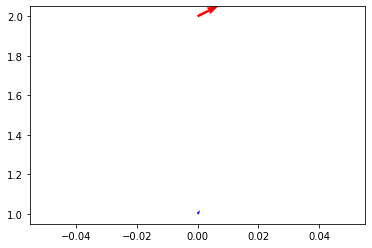

In [299]:
A = np.array([[4, 1], [1, 3]])
print_matrix(A)
b = np.array([[1], [2]])
print_matrix(b)
z = np.matmul(A, b)
# print_matrix(z)
x0 = np.array([[2], [1]])
print_matrix(x0)
xf, list_x = conj_gradient_descent(A, b, x0)
print_matrix(xf)
print(list_x)

vector_x = []

for i in list_x:
  sub_vec_x = []
  for j in i:
    sub_vec_x.append(j[0])
  vector_x.append(sub_vec_x)

print(vector_x, type(vector_x))

v = np.array(vector_x)
print(v, type(v))
origin = []
origin.append([0, 0])
for i in range(1, len(vector_x)):
  origin.append(vector_x[i-1])

origin = np.array(origin)
print(origin, type(origin))

plt.quiver(*origin, v[:,0], v[:,1], color=['r','b','g'], scale=31)
plt.show()

In [156]:
def print_matrix(m):
  callers_local_vars = ins.currentframe().f_back.f_locals.items()
  varName = [var_name for var_name, var_val in callers_local_vars if var_val is m]
  print(f'{varName[0]} = {m}\n===============================')